In [4]:
import os 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random
from sklearn import mixture
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

#from EM import *

sns.set()

In [3]:
data_dir = 'C:\\Users\\duise\\Documents\\Cours\\Medical\\tp3'
os.chdir(data_dir)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\duise\\Documents\\Cours\\Medical\\tp3'

Text(0.5, 1.0, 'Simulated 1D Data denstiy')

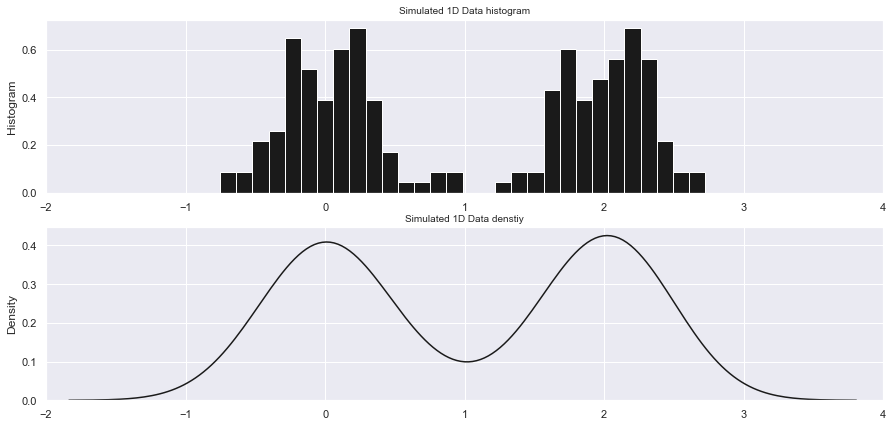

In [5]:
mu1, sigma1 = 0, 0.3 # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 100)
y1 = np.repeat(0, 100)
mu2, sigma2 = 2, 0.3 # mean and standard deviation
s2 = np.random.normal(mu2, sigma2, 100)
y2 = np.repeat(1, 100)
mu = [mu1, mu2]
sigma = [sigma1, sigma2]
data = np.concatenate([s1,s2])
y = np.concatenate([y1,y2])

plt.figure(figsize = (15,7))
ax1 = plt.subplot(211)
plt.hist(data , color = 'k' ,bins = 30 , density  = True)
plt.ylabel('Histogram')
plt.xlim(-2,4)
plt.title('Simulated 1D Data histogram' , fontsize = 'small')

ax2 = plt.subplot(212 ,sharex = ax1)
sns.kdeplot(data , color = 'k')
plt.title('Simulated 1D Data denstiy' , fontsize = 'small')


L'initialisation des paramètres joue un rôle important dans la convergence de l'algorithme. Pour illustrer on peut regarder ce que donne l'algorithme de scikit learn avec une initialisation aléatoire et une initialisation non aléatoire.

[]

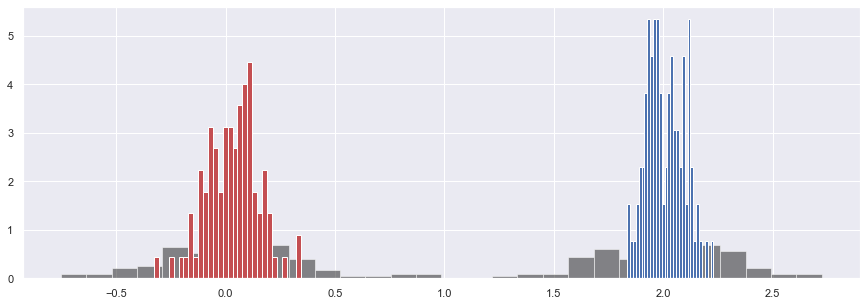

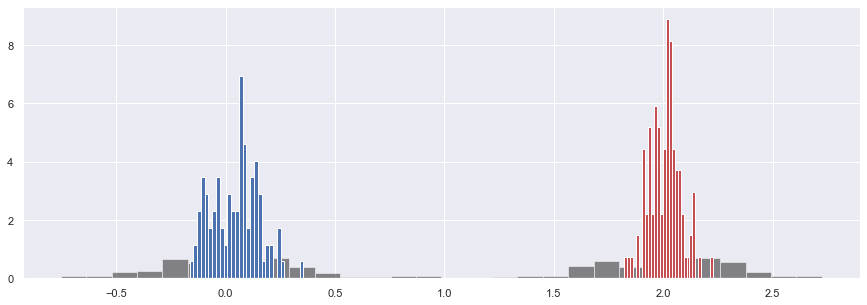

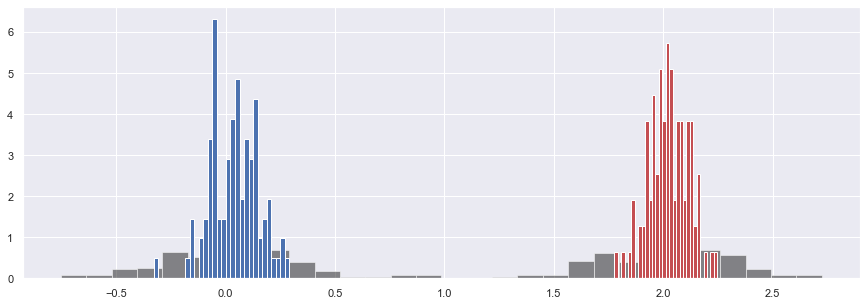

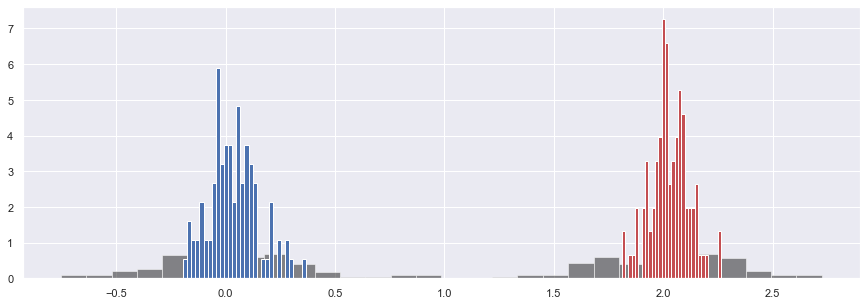

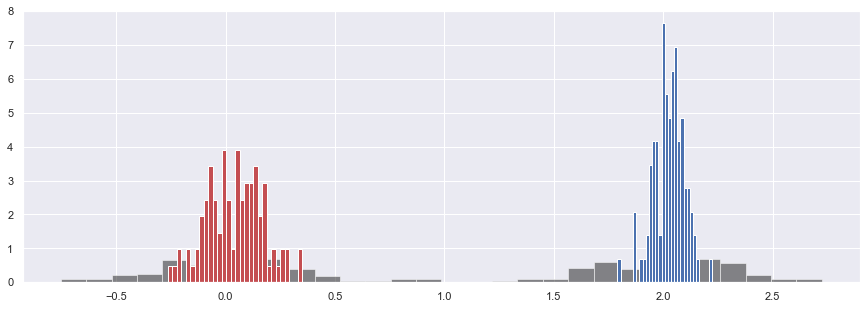

In [6]:
clf = mixture.GaussianMixture(n_components=2,init_params = 'kmeans') # initialisation non aléatoire
for i in range(5): 
    clf.fit(data.reshape(-1 ,1 ))
    c1 = np.random.normal(clf.means_.ravel()[0] , clf.covariances_.ravel()[0] , size = 100)
    c2 = np.random.normal(clf.means_.ravel()[1] , clf.covariances_.ravel()[1] , size = 100)

    n_bins = 30
    fig = plt.figure(figsize =(15,5))
    plt.hist(data , color = 'k' ,density = True ,  alpha = 0.5 , bins = n_bins)
    plt.hist(c1, color = 'r' ,density = True ,  bins = n_bins)
    plt.hist(c2, color = 'b' ,density = True ,  bins = n_bins)
    # print(f'convergence : {clf.converged_}')
    # print(f'n_iter : {clf.n_iter_}')
    # print(f'means : {clf.means_.ravel()}', f', true means: {mu}')
    # print(f'cov : {clf.covariances_.ravel()}',f', true cov: {sigma}')
plt.plot()

[]

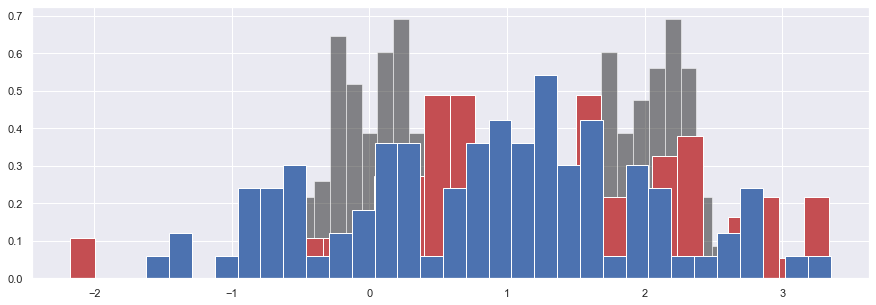

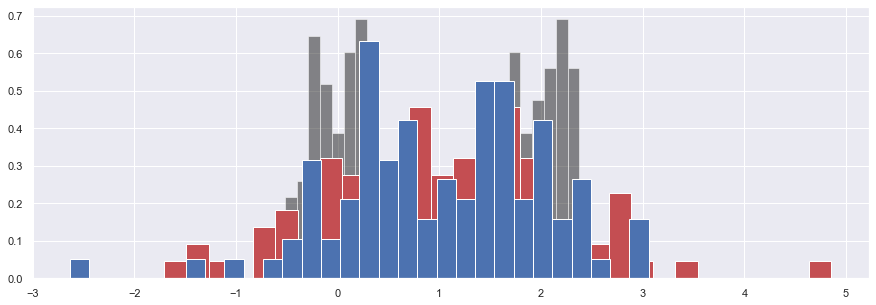

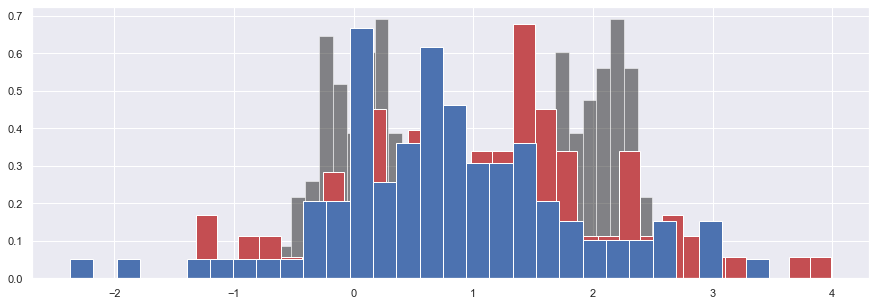

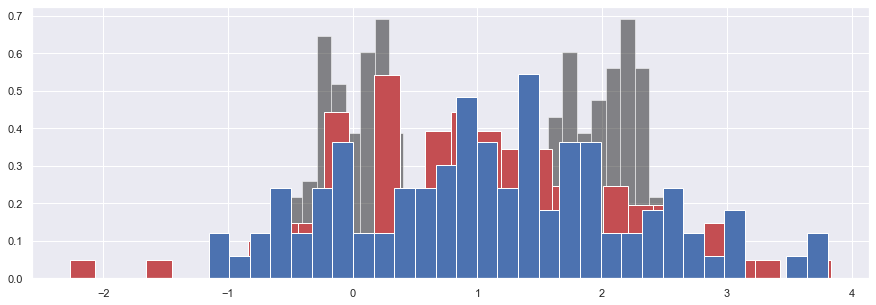

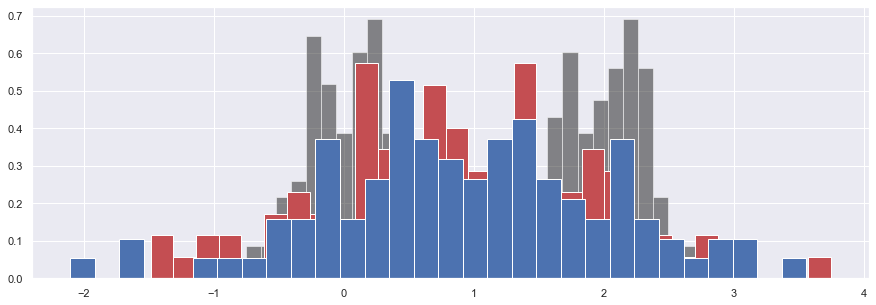

In [7]:
clf = mixture.GaussianMixture(n_components=2,init_params = 'random') # initialisation aléatoire
for i in range(5): 
    clf.fit(data.reshape(-1 ,1 ))
    c1 = np.random.normal(clf.means_.ravel()[0] , clf.covariances_.ravel()[0] , size = 100)
    c2 = np.random.normal(clf.means_.ravel()[1] , clf.covariances_.ravel()[1] , size = 100)

    n_bins = 30
    fig = plt.figure(figsize =(15,5))
    plt.hist(data , color = 'k' ,density = True ,  alpha = 0.5 , bins = n_bins)
    plt.hist(c1, color = 'r' ,density = True ,  bins = n_bins)
    plt.hist(c2, color = 'b' ,density = True ,  bins = n_bins)
    # print(f'convergence : {clf.converged_}')
    # print(f'n_iter : {clf.n_iter_}')
    # print(f'means : {clf.means_.ravel()}', f', true means: {mu}')
    # print(f'cov : {clf.covariances_.ravel()}',f', true cov: {sigma}')
plt.plot()

In [8]:
def pr_single_comp(mu, sigma, x , weigths):
    prob = []
    for i in range(0, x.shape[0]):
        prob.append(np.array(weigths)*np.exp(-0.5*((x[i,]-mu)/sigma)**2)/(np.sqrt(2*np.pi)*np.array(sigma)))
    return prob

def pr_single_normalized(mu,sigma, x ,weights):
    unnorm_prob = pr_single_comp(mu, sigma, x ,weights)
    normalization = np.sum(unnorm_prob, axis=1)
    prob = []
    for i in range(0, len(unnorm_prob)):
        prob.append(unnorm_prob[i]/normalization[i])
    return prob

def update_mu(x,mu,sigma,weights) :
    prob = pr_single_normalized(mu,sigma,x,weights)
    hat_mu = [0, 0]
    for i in range(0, len(prob)) :
        hat_mu = hat_mu + prob[i]*x[i,]
    hat_mu = hat_mu/np.sum(prob, axis=0)
    return hat_mu

def update_sigma(x,mu,sigma,weights):
    prob = pr_single_normalized(mu,sigma,x,weights)
    hat_sigma = [0, 0]
    for i in range(0, len(prob)) :
        hat_sigma = hat_sigma + prob[i]*(x[i,] - mu)**2
    hat_sigma = hat_sigma/np.sum(prob, axis=0)
    return hat_sigma

def log_vraisemblance(x,mu,sigma,weights):
    prob = pr_single_comp(mu, sigma, x , weights)
    return np.sum(np.log(np.sum(prob , axis = 1)))

    
def em_1D(x, mu_old , sigma_old):
    weights = [0.5 , 0.5]
    NbIter = 10
    # distances = np.array([np.abs(x_i - x_j) for x_i,x_j in  ])

    # Learning procedure (optimization)
    # print(f'true mu : {mu}')
    # print(f'true sigma: {sigma}\n')
    for iter in range(1, NbIter + 1):
        w = weights
        weights = np.mean(pr_single_normalized(mu_old,sigma_old, x ,w),axis = 0)
        hat_mu = update_mu(x ,mu_old,sigma_old,w)
        hat_sigma = update_sigma(x ,mu_old,sigma_old,w)
        mu_old = hat_mu
        sigma_old = hat_sigma + 1e-13

    return mu_old , sigma_old

In [9]:
for i in range(10):
    mu_old = [random.uniform(-2, 2), random.uniform(0, 4)]
    sigma_old = [0.3 , 0.3]
    mu_hat  , sigma_hat = em_1D(data , mu_old , sigma_old)
    if np.isnan(mu_hat).sum() + np.isnan(sigma_hat).sum() != 0:
        continue
    print(mu_hat , sigma_hat)
    #g1 = np.random.normal(mu_hat[0] , sigma_hat[0] , size = 100)
    #g2 = np.random.normal(mu_hat[1] , sigma_hat[1] , size = 100)

    #n_bins = 40
    #plt.figure(figsize = (15,5))
    #plt.hist(s1, color = 'k', bins = n_bins ,alpha = 0.5 ,  label = 'class 1 ')
    #plt.hist(s2, color = 'y', bins = n_bins ,alpha = 0.5 ,  label = 'class 2 ')
    #plt.hist(g1, color = 'r', bins = n_bins , label = 'pred class 1 ')
    #plt.hist(g2 , color = 'b', bins = n_bins , label = 'pred class 2 ')
    # plt.hist(c1, color = 'orange', bins = n_bins, label = 'pred clf class 1 ')
    # plt.hist(c2 , color = 'green', bins = n_bins, label = 'pred clf class 2 ')
    #plt.legend()
#plt.plot()

/var/folders/r6/mxny7px54mq8gb7zj2mt9vdw0000gn/T/ipykernel_16907/2735672391.py:20: RuntimeWarning: invalid value encountered in true_divide
  hat_mu = hat_mu/np.sum(prob, axis=0)
/var/folders/r6/mxny7px54mq8gb7zj2mt9vdw0000gn/T/ipykernel_16907/2735672391.py:28: RuntimeWarning: invalid value encountered in true_divide
  hat_sigma = hat_sigma/np.sum(prob, axis=0)


[1.01774216 2.17264867] [1.07910385e+00 1.00000000e-13]
[0.03229514 2.01473824] [0.11177185 0.08387588]
[0.03229514 2.01473824] [0.11177185 0.08387588]
[2.09725944 1.02351669] [1.00000000e-13 1.08034403e+00]
[-0.07999561  1.02351669] [1.00000000e-13 1.08034403e+00]
[0.9626921  1.08327618] [1.07964481 1.07386242]


### 2D EM 

In [381]:
def pdf(X, mu, sigma):
    invsigma = np.linalg.inv(sigma + 1e-6*np.eye(sigma.shape[0]))
    r = np.exp(-0.5*np.diag((X-mu).dot(invsigma.dot((X-mu).T))))
    r *= np.sqrt(np.linalg.det(invsigma/(2*np.pi)))
    return r

def p_given_mu_sigma(x,mu,sigma,poids):
    return np.array([p*pdf(x , m, s) for p,m,s in zip(poids,mu,sigma)])

def expectation_step(x,mu,sigma,poids):
    prob = p_given_mu_sigma(x , mu , sigma , poids)
    return  prob/prob.sum(axis = 0)

    
def minimisation_step(x,mu,sigma,poids):
    p = expectation_step(x,mu,sigma,poids)
    mu = p.dot(x) / p.sum(axis=1)[:, np.newaxis] 
    sigma = np.array([(x-m).T.dot(np.diag(w).dot(x-m))  / w.sum()
                           for w, m in zip(p, mu)])
    poids = p.mean(axis=0)
    return mu,sigma ,poids 

In [442]:
def plot_cov(cov, mean=[0, 0], cst=6, num=200):
    cov = np.linalg.inv(np.asarray(cov))
    mean = np.asarray(mean)
    theta = np.linspace(0, 2*np.pi, num=num)
    X = np.c_[np.cos(theta), np.sin(theta)]
    X = X.T * np.sqrt(cst / np.diag(X.dot(cov.dot(X.T))))
    X = X.T + mean
    plt.plot(X[:, 0], X[:, 1], 'r')
    
def plot_em2D(X,Y):
    n_components = np.unique(Y).shape[0]
    fig = plt.figure(figsize = (15,5))
    fig.suptitle("EM algorithm with 2D data")
    for i in range(10):
        mu_old = np.random.permutation(X)[:n_components]
        sigma_old = np.array([np.eye(X.shape[1]) for k in range(n_components)])
        poids = np.array([1/n_components]*n_components)
        mu_old  , sigma_old , poids = minimisation_step(X,mu_old,sigma_old,poids)
        plt.subplot(2,5,i+1)
        plt.scatter(X[:,0] , X[:,1],c = Y,edgecolor = 'k')
        for k in range(n_components):
            plot_cov(sigma_old[k] , mu_old[k])


In [446]:
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)

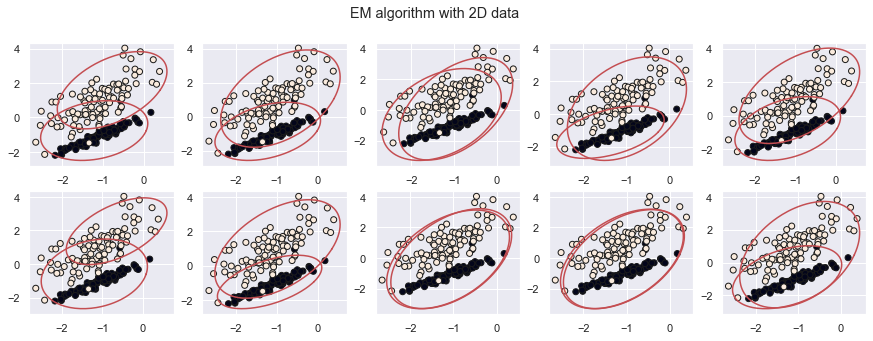

In [443]:
plot_em2D(X1,Y1)

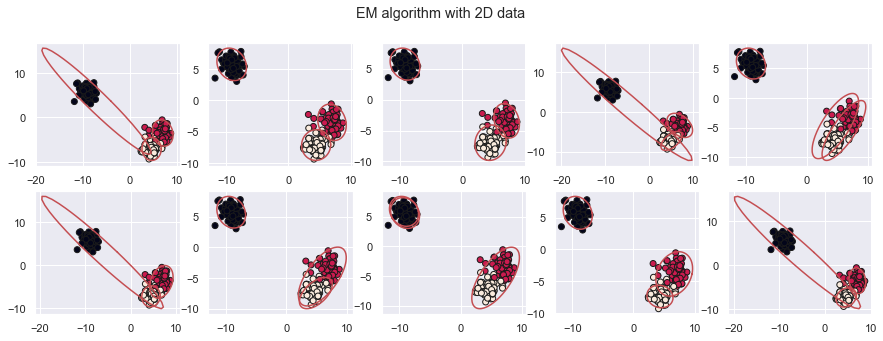

In [444]:
plot_em2D(X2,Y2)

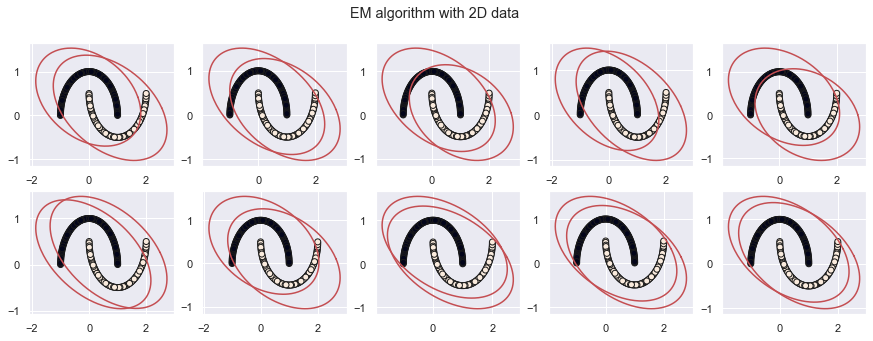

In [445]:
plot_em2D(X3,Y3)